# 1. Problem Description

The data has been downloaded from Kaggle. ("https://www.kaggle.com/berkanacar/churn-prediction-by-selecting-from-11-tuned-models/data")


**This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.**

# Data Description

1. RowNumber: S.N. (sequence number)
2. Customerid: unique customerid hashed
3. Surname : Last name of the customer
4. CreditScore : The credit score of the customer
5. Geography : The country of the customer(Germany/France/Spain)
6. Gender : The gender of the customer (Female/Male)
7. Age : The age of the customer
8. Tenure : The customer's number of years in the in the bank
9. Balance : The customer's account balance
10. NumOfProducts : The number of bank products that the customer uses
11. HasCrCard : Does the customer has a card? (0=No,1=Yes)
12. IsActiveMember : Does the customer has an active mebership (0=No,1=Yes)
13. EstimatedSalary : The estimated salary of the customer
14. Exited : Churned or not? (0=No,1=Yes)

In [1]:
import os
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
sns.set_context('talk')

data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
data.shape

(10000, 14)



## Keeping data pristine

In [3]:
df = data.copy() # we will keep data pristine and use df for our model calculation



# 2. Exploratory Data Analysis

### Any duplicates ? 

In [4]:
df.duplicated().sum()

0

**No Duplicates**

### Any null values ?

In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**No missing values**

### Is data set balanced or Unbalanced ?

In [6]:
df.Exited.value_counts(normalize =True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

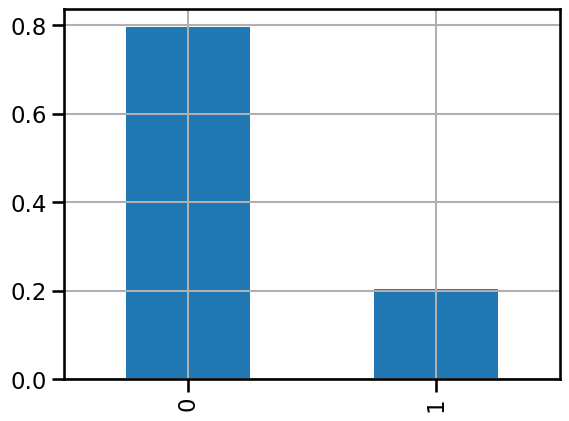

In [7]:
df.Exited.value_counts(normalize =True).plot.bar()
plt.grid()
plt.show()

**Dataset is unbalanced
  Not Churned (0) ~ 80 %
  Churned(1)     ~ 20 %**



### We will look at features to remove that are not important before building our model

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [10]:
#Removing data that are not important 

to_remove = ['RowNumber', 'CustomerId', 'Surname']

In [11]:
df = df.drop(to_remove,axis=1)

In [12]:
df.shape

(10000, 11)

In [13]:
df.head() 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### We will OneHotEncode categorical values

In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
for x in df.columns:
    print("%20s %20d"%(x, df[x].nunique()))

         CreditScore                  460
           Geography                    3
              Gender                    2
                 Age                   70
              Tenure                   11
             Balance                 6382
       NumOfProducts                    4
           HasCrCard                    2
      IsActiveMember                    2
     EstimatedSalary                 9999
              Exited                    2


In [16]:
categorical_columns = []

for x in df.columns:
    if df[x].nunique()<10:
        categorical_columns.append(x)
        
categorical_columns

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

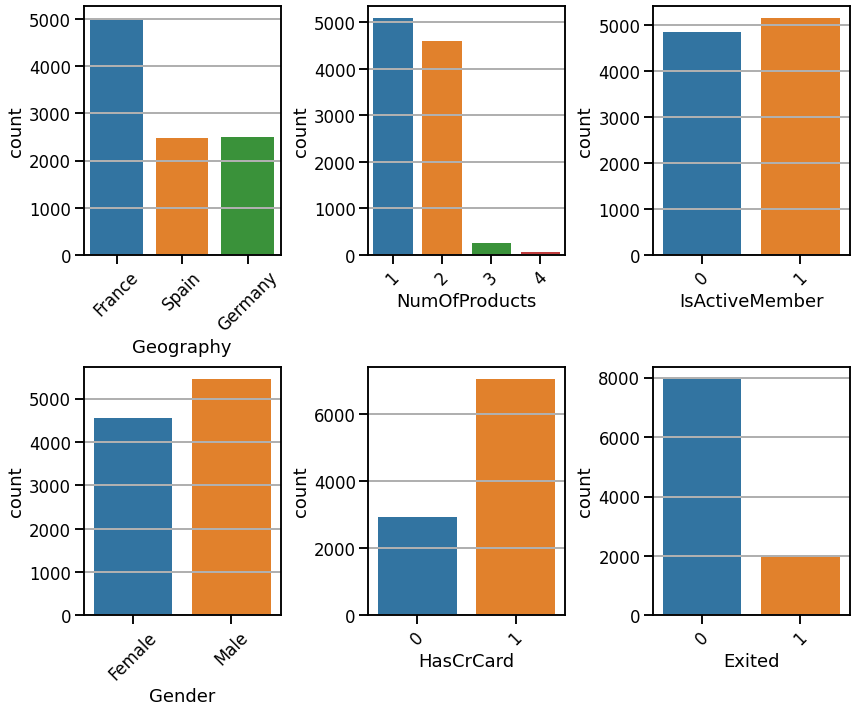

In [17]:
%matplotlib inline 

nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize=(12, 10))



for ii in range(0,len(categorical_columns)):
    
    row = ii % nrows
    col = ii // (ncols + (nrows-ncols))
    
    
    ax[row][col].grid(linestyle='-', linewidth=2)
    
    sns.countplot(ax=ax[row,col], x = categorical_columns[ii],data= df)
    ax[row][col].tick_params(axis='x', labelrotation=45)
    
plt.tight_layout()
plt.show()


**We observe: <br>
    1. Geography: Most customers are from France (~50%). Spain and Germany make up rest 50 % (almost even split). <br>
    2. NumOfProducts: About 50% percent of customers have signed up for 1 product, while 45 % have two product, very few have 3 or 4. <br>
    3. IsActivemember: This is evenly splitted. <br>
    4. Gender: This is almost evenly splitted. Male about ~55 %  <br>
    5. HasCrCard: About 70% of the customers have CC.**
   

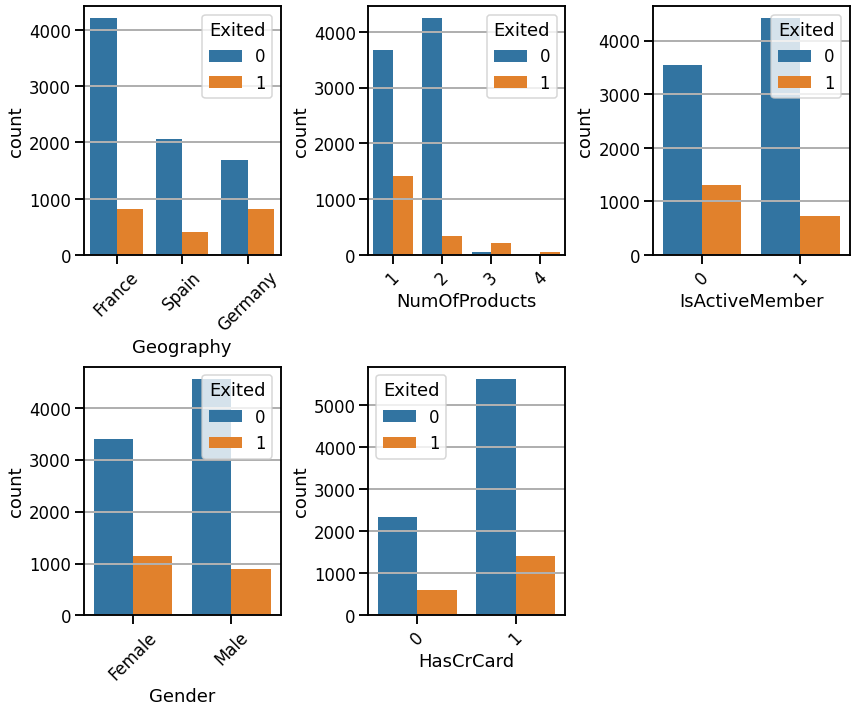

In [18]:
#Plotting with target variable as hue

%matplotlib inline 

nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize=(12, 10))

ax[1][2].remove()



for ii in range(0,len(categorical_columns)-1):
    
    row = ii % nrows
    col = ii // (ncols + (nrows-ncols))
    
    
    ax[row][col].grid(linestyle='-', linewidth=2)
    
    
    sns.countplot(ax=ax[row,col], x = categorical_columns[ii], data= df, hue='Exited')
    ax[row][col].tick_params(axis='x', labelrotation=45)
    
plt.tight_layout()
plt.show()

**We observe:<br>
    1. NumberofProducts: Customers with 1 products only exited more.<br>
    2. IsActiveMember: Inactive members had higher rate of exiting.** 

In [19]:
continuous_cols = []

for x in df.columns:
    if x not in categorical_columns:
        continuous_cols.append(x)
        
continuous_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

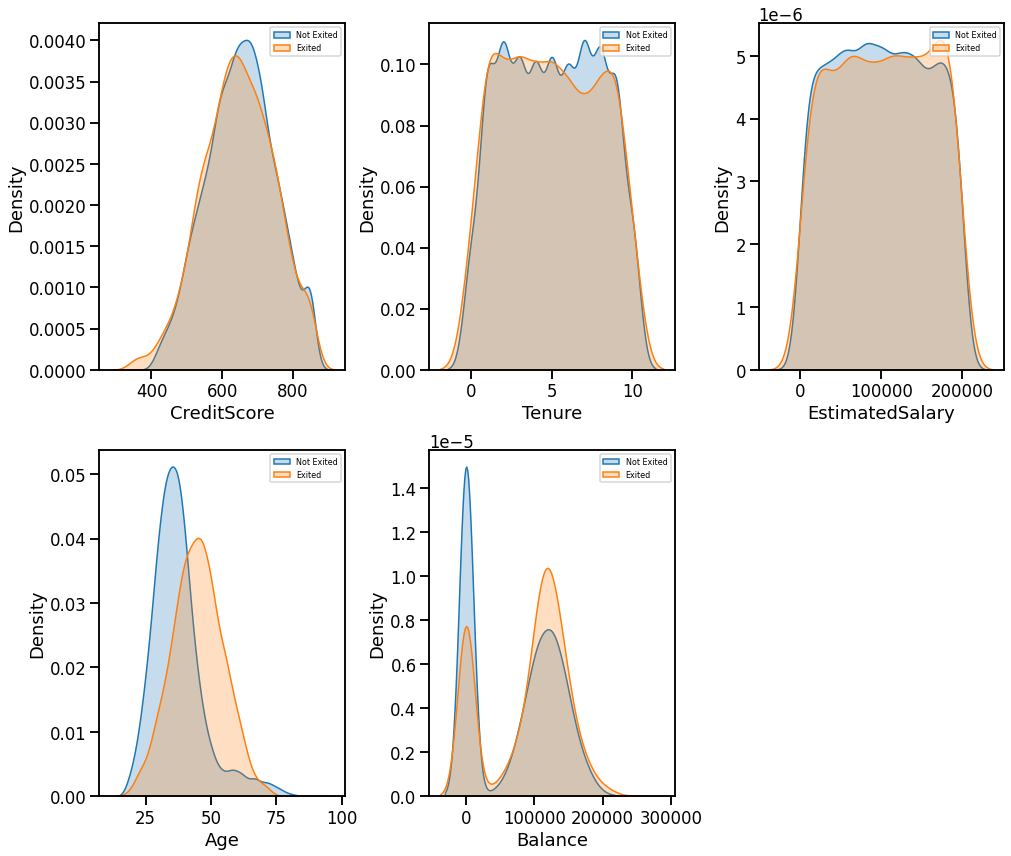

In [20]:
nrows = 2
ncols = 3 

fig, ax = plt.subplots(2,3, figsize = (14,12))
fig.delaxes(ax[1][2])

for ii in range(0,len(continuous_cols)):
   
    value =str(continuous_cols[ii])
    
    row = ii % nrows
    col = ii // (ncols + (nrows-ncols))
    
        
    sns.kdeplot(ax=ax[row,col], x = df.loc[df['Exited'] == 0, value],   label = 'Not Exited', fill=True)
    sns.kdeplot(ax=ax[row,col], x= df.loc[df['Exited'] == 1, value],    label = 'Exited', fill=True)
    ax[row][col].legend(loc=0, prop ={'size' :8})


plt.tight_layout()

**We observe:<br>
    1. CreditScore: Higher credit score people tend to exit less. <br>
    2. Age: Older age customers tend to exit more.**

## Looking at Variable correlations 

### Removing highly correlated values

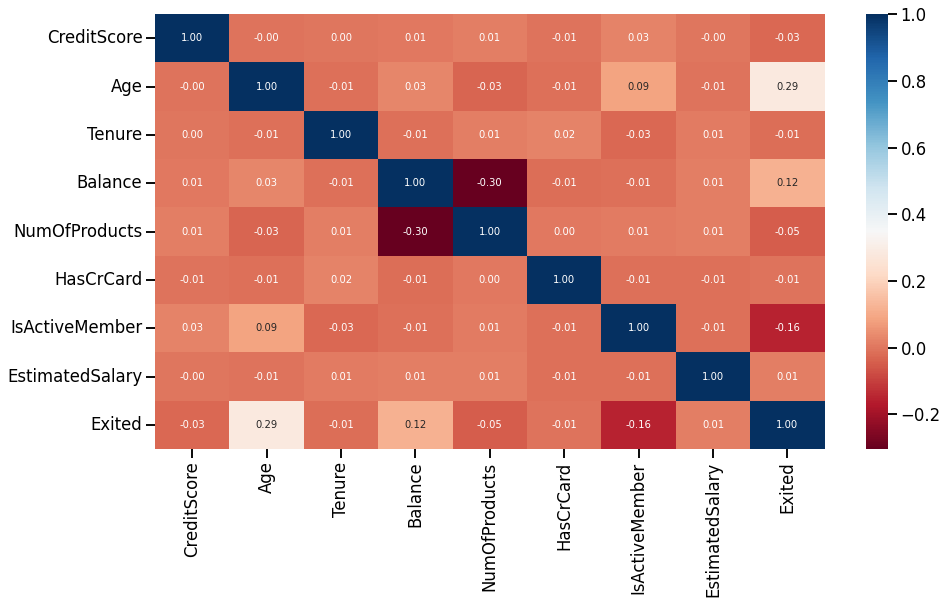

In [21]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.heatmap(df.corr(), cmap ='RdBu', annot= True, fmt ='0.2f')
plt.show()

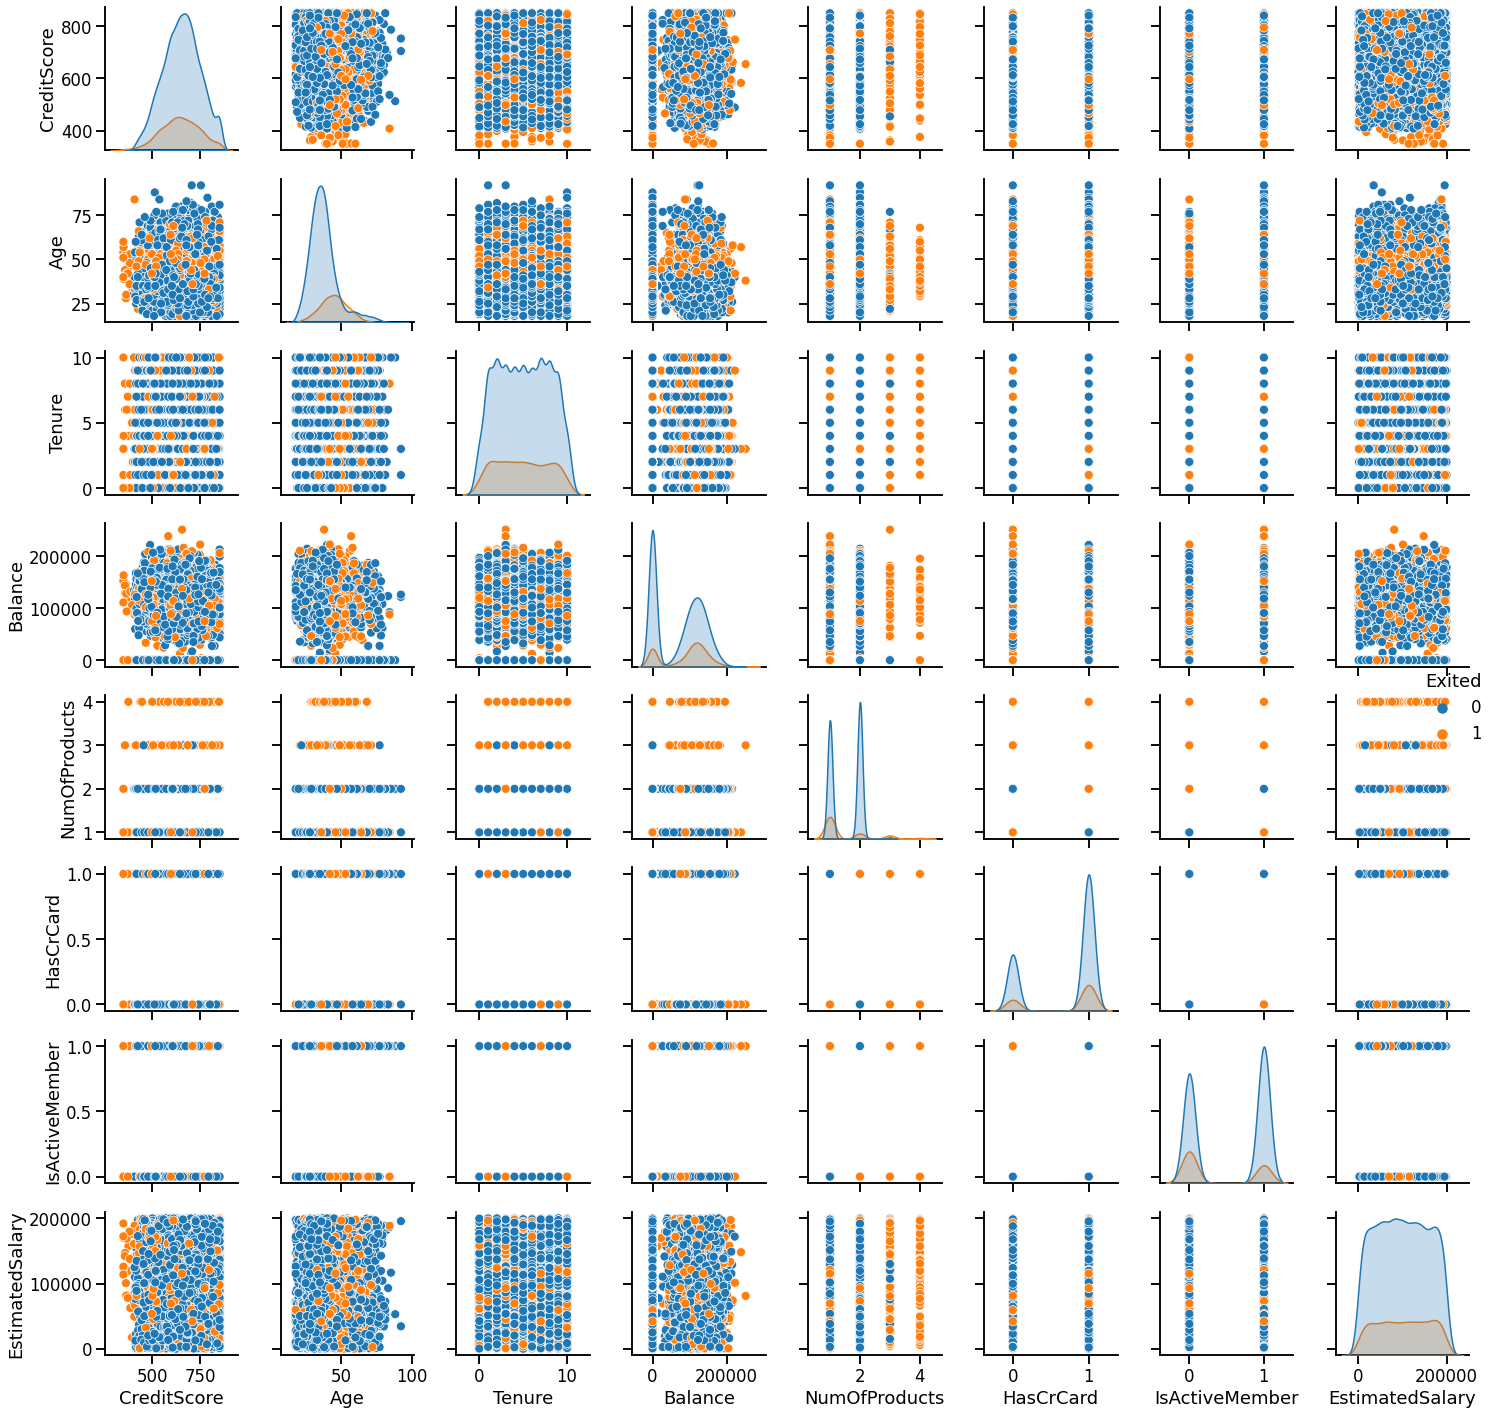

In [22]:
sns.set_context('talk')
sns.pairplot(df, diag_kind ='kde', hue='Exited')
plt.tight_layout()
plt.show()

#### We do not observe strong correlations among the features from both heatmap and pairplot.

## OneHotEncoding

In [23]:
categorical_variables = []


for x in df.columns:
    if df[x].nunique() >=2  and df[x].nunique() <10 and x != 'Exited':
        categorical_variables.append(x)

print(categorical_variables)

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


In [24]:
df = pd.get_dummies(df, columns=categorical_variables)

In [25]:
df.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,1,0,0,1,0,1,0,0,0,0,1,0,1
1,608,41,1,83807.86,112542.58,0,0,0,1,1,0,1,0,0,0,1,0,0,1
2,502,42,8,159660.80,113931.57,1,1,0,0,1,0,0,0,1,0,0,1,1,0
3,699,39,1,0.00,93826.63,0,1,0,0,1,0,0,1,0,0,1,0,1,0
4,850,43,2,125510.82,79084.10,0,0,0,1,1,0,1,0,0,0,0,1,0,1


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geography_France,10000.0,0.501400,0.500023,0.00,0.00,1.000,1.0000,1.00
Geography_Germany,10000.0,0.250900,0.433553,0.00,0.00,0.000,1.0000,1.00
Geography_Spain,10000.0,0.247700,0.431698,0.00,0.00,0.000,0.0000,1.00
Gender_Female,10000.0,0.454300,0.497932,0.00,0.00,0.000,1.0000,1.00


In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

for x in continuous_cols:
    value = [str(x)]
    df[x] = sc.fit_transform(df[value])
    

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,-4.824585e-16,1.000050,-3.109504,-0.688359,0.015222,0.698109,2.063884
Age,10000.0,2.318146e-16,1.000050,-1.994969,-0.660018,-0.183251,0.484225,5.061197
Tenure,10000.0,-1.078249e-16,1.000050,-1.733315,-0.695982,-0.004426,0.687130,1.724464
Balance,10000.0,-6.252776e-17,1.000050,-1.225848,-1.225848,0.331964,0.819920,2.795323
EstimatedSalary,10000.0,-2.877698e-17,1.000050,-1.740268,-0.853594,0.001803,0.857243,1.737200
Exited,10000.0,2.037000e-01,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000
Geography_France,10000.0,5.014000e-01,0.500023,0.000000,0.000000,1.000000,1.000000,1.000000
Geography_Germany,10000.0,2.509000e-01,0.433553,0.000000,0.000000,0.000000,1.000000,1.000000
Geography_Spain,10000.0,2.477000e-01,0.431698,0.000000,0.000000,0.000000,0.000000,1.000000
Gender_Female,10000.0,4.543000e-01,0.497932,0.000000,0.000000,0.000000,1.000000,1.000000


In [29]:
df.dtypes[df.dtypes ==object]

Series([], dtype: object)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,-4.824585e-16,1.000050,-3.109504,-0.688359,0.015222,0.698109,2.063884
Age,10000.0,2.318146e-16,1.000050,-1.994969,-0.660018,-0.183251,0.484225,5.061197
Tenure,10000.0,-1.078249e-16,1.000050,-1.733315,-0.695982,-0.004426,0.687130,1.724464
Balance,10000.0,-6.252776e-17,1.000050,-1.225848,-1.225848,0.331964,0.819920,2.795323
EstimatedSalary,10000.0,-2.877698e-17,1.000050,-1.740268,-0.853594,0.001803,0.857243,1.737200
Exited,10000.0,2.037000e-01,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000
Geography_France,10000.0,5.014000e-01,0.500023,0.000000,0.000000,1.000000,1.000000,1.000000
Geography_Germany,10000.0,2.509000e-01,0.433553,0.000000,0.000000,0.000000,1.000000,1.000000
Geography_Spain,10000.0,2.477000e-01,0.431698,0.000000,0.000000,0.000000,0.000000,1.000000
Gender_Female,10000.0,4.543000e-01,0.497932,0.000000,0.000000,0.000000,1.000000,1.000000


### Lets save the processed data

In [31]:
import pickle 
df.to_pickle("./processed_clean_churn_data.pkl")

## Train, Test Split

In [32]:
df = pd.read_pickle("./processed_clean_churn_data.pkl")
df.shape

(10000, 19)

**We will consider last 0.20 percent data as your test value.**


In [33]:
feature_cols = df.columns[1:]
X = df.drop(['Exited'], axis =1)
y = df['Exited']

In [34]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3', 'NumOfProducts_4', 'HasCrCard_0', 'HasCrCard_1',
       'IsActiveMember_0', 'IsActiveMember_1'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80,test_size=0.20, 
                                                    random_state=100, stratify = y)



### Check Stratified ( y ) train and test data sets ? 

In [36]:
y_train.value_counts(normalize =True)

0    0.79625
1    0.20375
Name: Exited, dtype: float64

In [37]:
y_test.value_counts(normalize = True)

0    0.7965
1    0.2035
Name: Exited, dtype: float64

# 4. Classification 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

## Models

In [39]:
r = 101 
#Weight for the imbalanced data
w = {0: 0.8, 1: 0.2}


models = [LogisticRegression(random_state=r, class_weight = w), 
          RandomForestClassifier(random_state=r, class_weight = w),
          DecisionTreeClassifier(random_state=r, class_weight = w),
          KNeighborsClassifier(), 
          SVC(random_state= r,kernel ='rbf',class_weight = w, probability=True),
          AdaBoostClassifier(random_state = r),
          GradientBoostingClassifier(random_state=r)]



names = ["LR","RF","DTC","KNN", "SVC", "ABC", "GBC"]


### Parameters

In [40]:
# logistic regression
lr_params= {"C":np.logspace(-3, 1, 10),
                    "penalty": ["l2"], "solver":['lbfgs', 'liblinear'], "max_iter":[10000]}

#random forest
n_estimator = [int(x) for x in np.linspace(start = 30, stop = 301, num = 10)]
rf_params = {"max_features": ["log2","sqrt"],
                "min_samples_split":[2,3,5,7],
                "min_samples_leaf":[1,3,5,7],
                 "max_depth":     [1,2,3,7],
                "n_estimators": n_estimator,
                "criterion":["gini","entropy"]}

#Decision Tree 
dt_params = {  "max_features": ["log2","sqrt"],
                "min_samples_split":[2,3,5,7],
                "min_samples_leaf":[1,3,5,7],
                "max_depth":     [1,2,3,7],
                "criterion":["gini","entropy"],
                "splitter":["best","random"]}

#KNeighborsClassifier
knn_params= {"n_neighbors": np.linspace(3,21,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

#SupportVectorMachine 
svc_params = {   "C":  np.logspace(-3, 2, 5),
                 "gamma": np.logspace(-4, 0, 5)}

#AdaBoost
n_estimator = [int(x) for x in np.linspace(start = 20, stop = 301, num = 10)]
abc_params = {"n_estimators": n_estimator,
              "learning_rate": [1.0, 0.1, 0.01,0.001]}

#GradientBoosting
n_estimator = [int(x) for x in np.linspace(start = 20, stop = 301, num = 10)]
gbc_params = {"n_estimators": n_estimator,
              "learning_rate": [1.0, 0.5, 0.1, 0.05, 0.01,0.001],
              "min_samples_split":[2,3,5,7],
              "min_samples_leaf":[1,3,5,7],
               "max_depth": [1,3,5,7],
               "max_features": ["log2","sqrt"]}


classifier_params = [lr_params, rf_params, dt_params, knn_params, svc_params, abc_params,
                     gbc_params]               
   

In [41]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

cv_result = {}
best_estimators = {}

for name, model,classifier_param in zip(names, models,classifier_params):
        clf =RandomizedSearchCV(estimator = model, param_distributions = classifier_param, n_iter = 100, cv = 10, 
                                verbose=2, random_state=10, n_jobs = 6)
        clf.fit(X_train,y_train)
        cv_result[name]=round(clf.best_score_,2)
        best_estimators[name]=clf.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])

Fitting 10 folds for each of 20 candidates, totalling 200 fits
LR cross validation accuracy : 0.820
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
RF cross validation accuracy : 0.830
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
DTC cross validation accuracy : 0.830
Fitting 10 folds for each of 40 candidates, totalling 400 fits
KNN cross validation accuracy : 0.840
Fitting 10 folds for each of 25 candidates, totalling 250 fits
SVC cross validation accuracy : 0.850
Fitting 10 folds for each of 40 candidates, totalling 400 fits
ABC cross validation accuracy : 0.860
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GBC cross validation accuracy : 0.870


In [42]:
best_estimators

{'LR': LogisticRegression(C=10.0, class_weight={0: 0.8, 1: 0.2}, max_iter=10000,
                    random_state=101),
 'RF': RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, max_depth=7,
                        max_features='sqrt', min_samples_split=3,
                        n_estimators=210, random_state=101),
 'DTC': DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, max_depth=7,
                        max_features='sqrt', min_samples_split=5,
                        random_state=101),
 'KNN': KNeighborsClassifier(metric='euclidean', n_neighbors=21, weights='distance'),
 'SVC': SVC(C=100.0, class_weight={0: 0.8, 1: 0.2}, gamma=0.1, probability=True,
     random_state=101),
 'ABC': AdaBoostClassifier(learning_rate=0.1, n_estimators=144, random_state=101),
 'GBC': GradientBoostingClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                            min_samples_split=7, n_estimators=82,
                            random_state=101)}

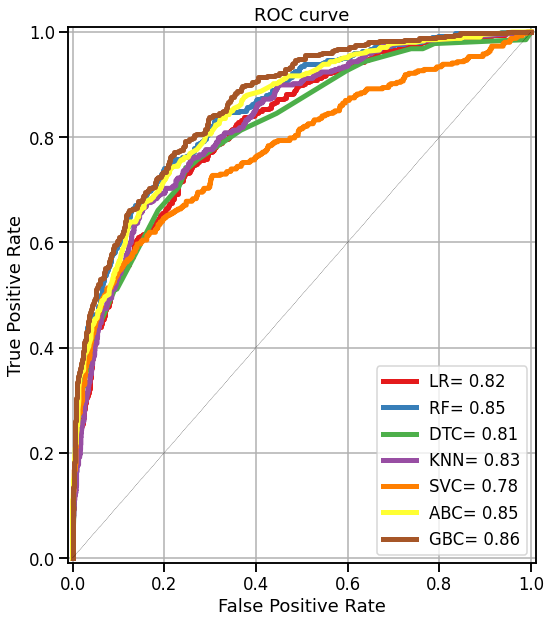

In [43]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, auc
sns.set_context('talk')

fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(8, 9)


colors =['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999','#cab2d6']
i=0
for x in names:
    model = best_estimators[x]

    # Get the probabilities for each of the two categories
    y_prob = model.predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

    roc_auc = round(auc(fpr, tpr),2)
    label_val = x + '= '+ str(roc_auc)
    ax.plot(fpr, tpr, color=colors[i], linewidth=5, label= label_val)
    i+=1
    
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)
ax.legend(loc=4)


plt.tight_layout()
plt.show()

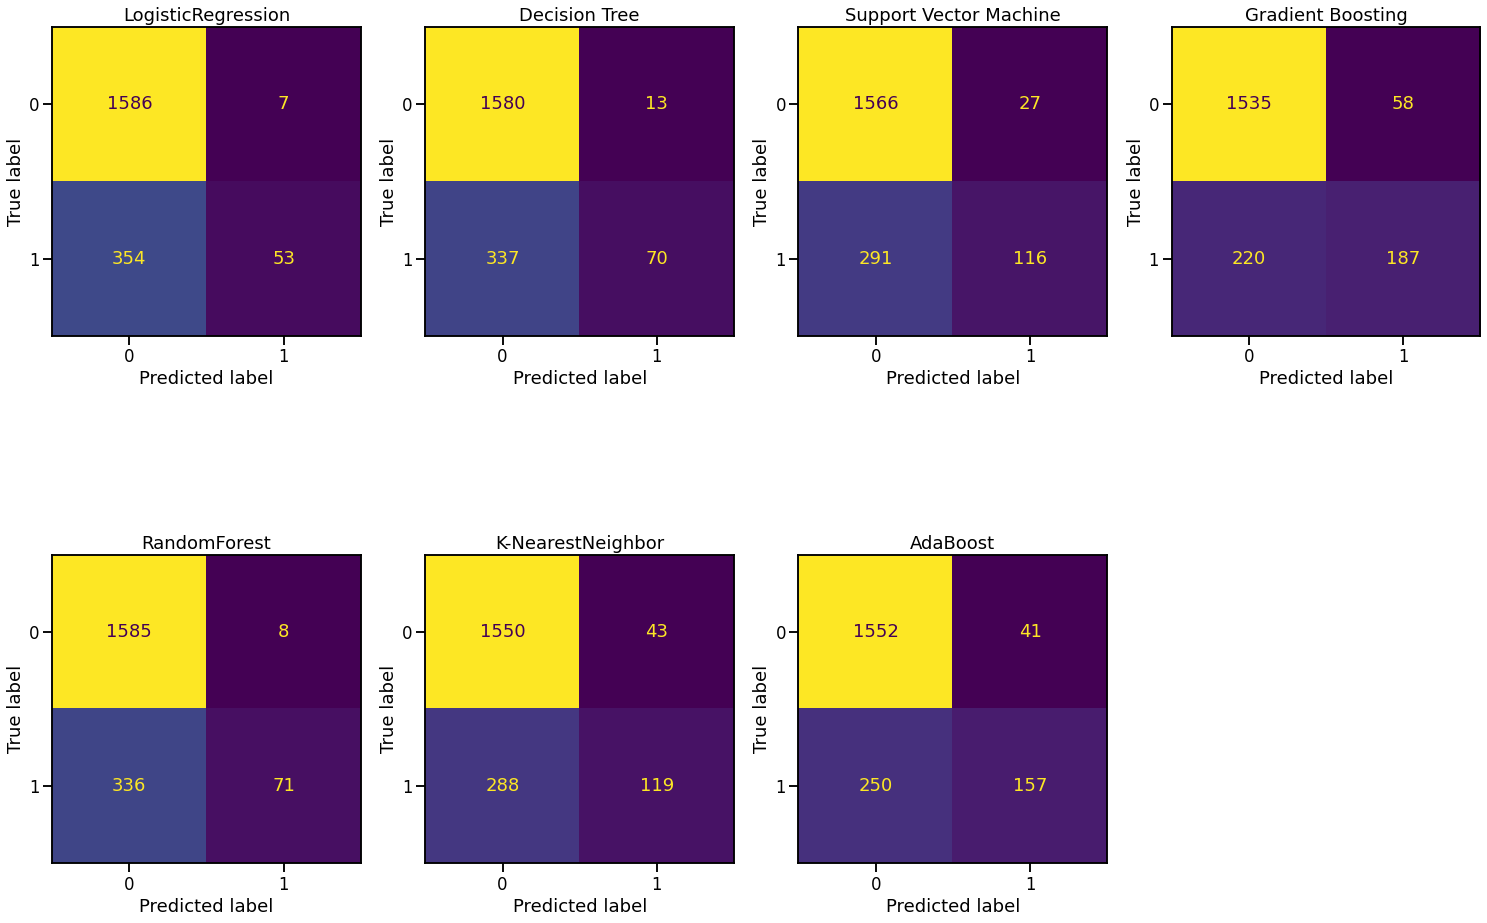

In [44]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_context('talk')

nrows = 2
ncols = 4



fig, ax = plt.subplots(nrows,ncols,figsize=(21,15))
ax[1,3].remove()
i=0
name_val =['LogisticRegression', 'RandomForest', 'Decision Tree', 'K-NearestNeighbor', 
           'Support Vector Machine', 'AdaBoost', 'Gradient Boosting']
for ii in range(0,len(names)): 
    
    row = ii % nrows
    col = ii // (ncols + (nrows-ncols))
    x = names[ii]
    model = best_estimators[x]
    y_pred = model.predict(X_test)

    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(ax = ax[row][col], colorbar = False)
    ax[row][col].set_title(name_val[i])
    i+=1
plt.tight_layout()

In [45]:
model = best_estimators['GBC']

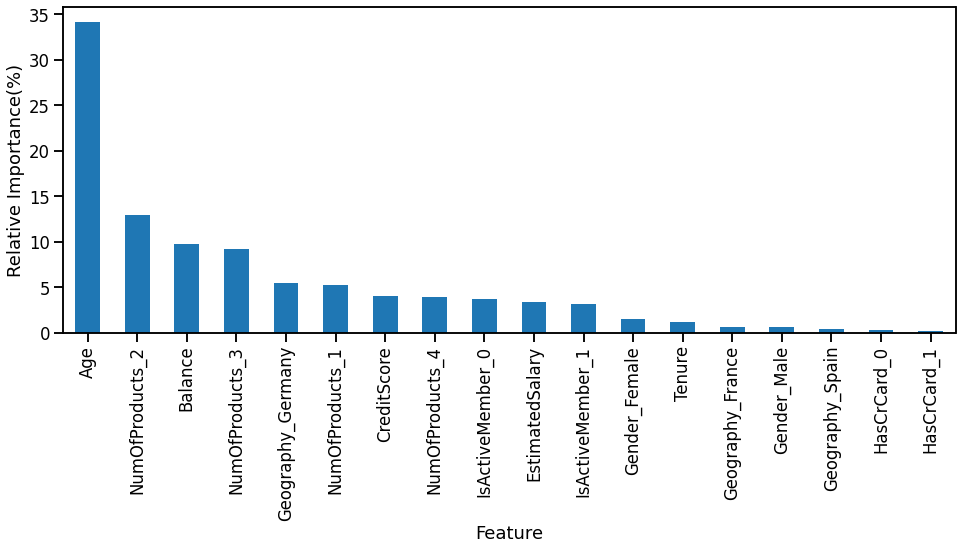

In [46]:
feature_imp = pd.Series(model.feature_importances_*100, index=X_train.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance(%)');
ax.set(xlabel='Feature')
plt.show()

# 5. Summary 

   **In summary, as highlighted in the EDA. Age is the most important factor for churn for this dataset i.e. Younger customers have higher churn. And Customers with more products are less like to Churn.** <br>
    
   **In General, Random Forest and two boosting methods (AdaBoost and GradientBoosting methods) do a better job in predicting churn for this dataset.**

# 6. Majority Voting 

In [47]:
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import VotingClassifier


In [48]:
names_voting =['RF','GBC','ABC','LR','KNN',"DTC", "SVC", "VC3", "VC5", "VC7"]
best_estimators_voting = best_estimators.copy()

In [49]:
#Top 3 classifiers 
best_estimators_voting["VC3"] = VotingClassifier(
         estimators=[(names_voting[0], best_estimators_voting[names_voting[0]]),
                     (names_voting[1], best_estimators_voting[names_voting[1]]),
                     (names_voting[2], best_estimators_voting[names_voting[2]])],
                     voting="soft")

# Top 5 classifiers
best_estimators_voting["VC5"] = VotingClassifier(
         estimators=[(names_voting[0], best_estimators_voting[names_voting[0]]),
                     (names_voting[1], best_estimators_voting[names_voting[1]]),
                     (names_voting[2], best_estimators_voting[names_voting[2]]),
                     (names_voting[3], best_estimators_voting[names_voting[3]]),
                     (names_voting[4], best_estimators_voting[names_voting[4]])],
                     voting="soft")

#All 7 classfiers
best_estimators_voting["VC7"] = VotingClassifier(
         estimators=[(names_voting[0], best_estimators_voting[names_voting[0]]),
                     (names_voting[1], best_estimators_voting[names_voting[1]]),
                     (names_voting[2], best_estimators_voting[names_voting[2]]),
                     (names_voting[3], best_estimators_voting[names_voting[3]]),
                     (names_voting[4], best_estimators_voting[names_voting[4]]),
                     (names_voting[5], best_estimators_voting[names_voting[5]]),
                     (names_voting[6], best_estimators_voting[names_voting[6]])],
                     voting="soft")


In [50]:
kf = KFold(shuffle=True, random_state=r, n_splits=10)

for name, best_estimator in zip(names_voting, best_estimators_voting):
    scores = cross_val_score(estimator = best_estimators_voting[name], X= X_train, y =y_train, cv = kf, scoring = 'roc_auc')
    
    print(f'ROC AUC: {scores.mean():.2f}'f'(+/- {scores.std():.2f}) [{name}]')

ROC AUC: 0.86(+/- 0.02) [RF]
ROC AUC: 0.87(+/- 0.02) [GBC]
ROC AUC: 0.85(+/- 0.02) [ABC]
ROC AUC: 0.83(+/- 0.02) [LR]
ROC AUC: 0.82(+/- 0.02) [KNN]
ROC AUC: 0.82(+/- 0.03) [DTC]
ROC AUC: 0.77(+/- 0.02) [SVC]
ROC AUC: 0.87(+/- 0.02) [VC3]
ROC AUC: 0.86(+/- 0.02) [VC5]
ROC AUC: 0.86(+/- 0.02) [VC7]


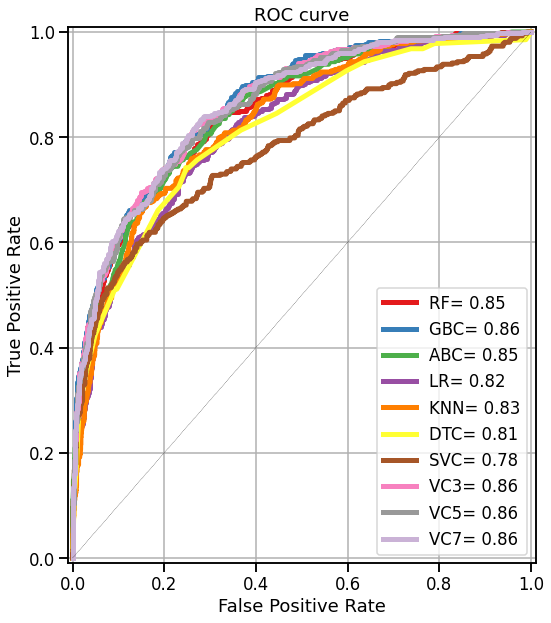

In [51]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, auc
sns.set_context('talk')

fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(8, 9)


colors =['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999','#cab2d6']
i=0
for x in names_voting:
    model = best_estimators_voting[x]
    

    # Get the probabilities for each of the two categories
    y_prob = model.fit(X_train, y_train).predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

    roc_auc = round(auc(fpr, tpr),2)
    label_val = x + '= '+ str(roc_auc)
    ax.plot(fpr, tpr, color=colors[i], linewidth=5, label= label_val)
    i+=1
    
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)
ax.legend(loc=4)


plt.tight_layout()
plt.show()

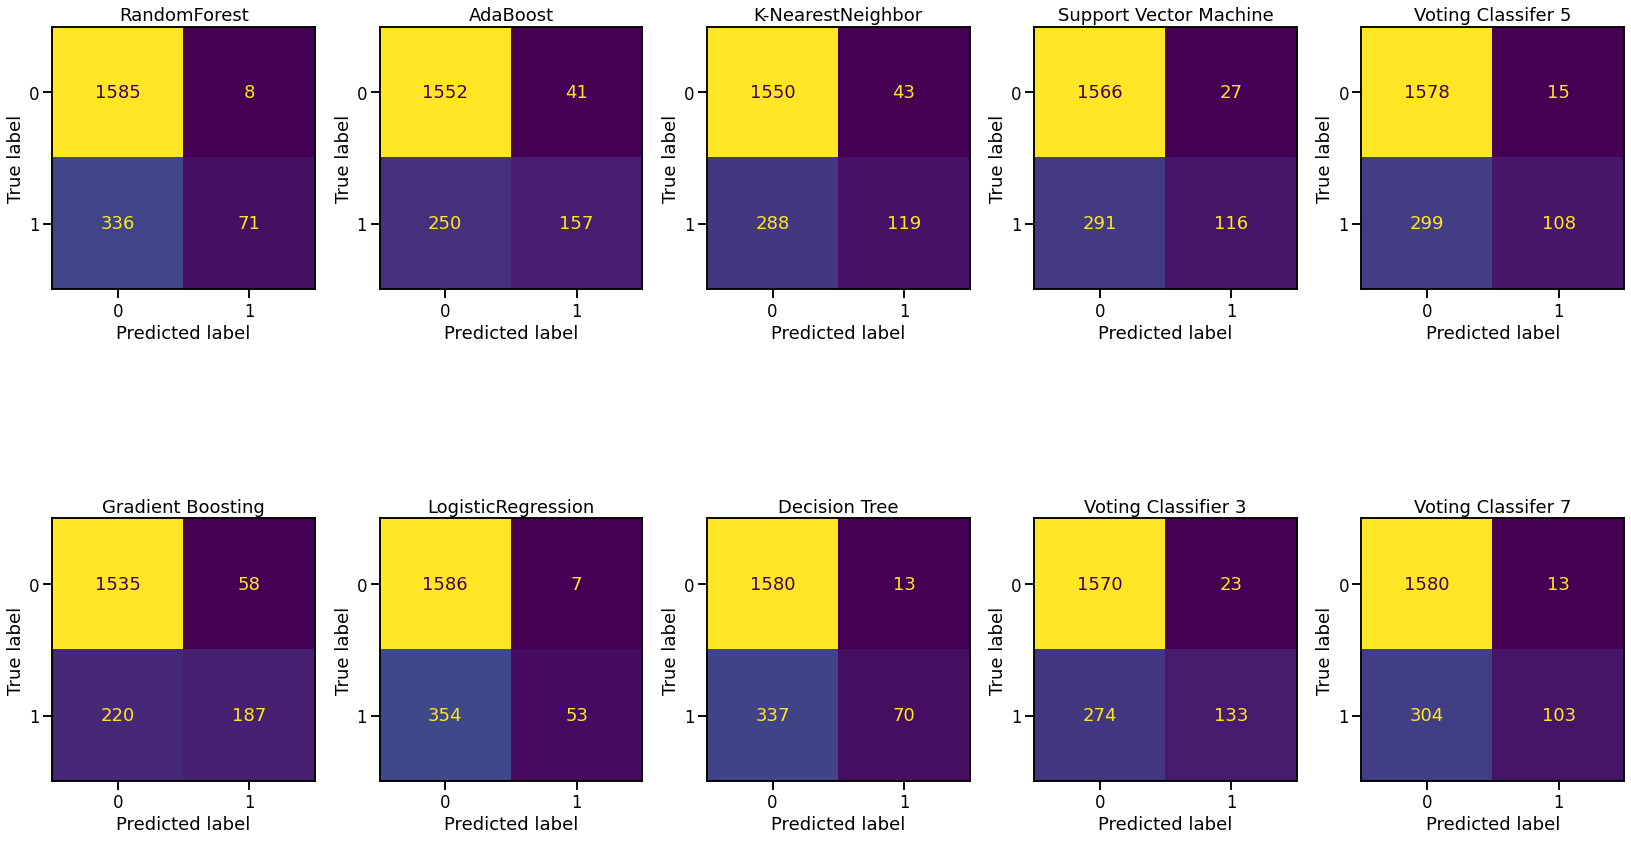

In [52]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_context('talk')

nrows = 2
ncols = 5



fig, ax = plt.subplots(nrows,ncols,figsize=(23,15))

i=0
name_val_voting =[ 'RandomForest',  'Gradient Boosting','AdaBoost', 
            'LogisticRegression', 'K-NearestNeighbor', 'Decision Tree',
             'Support Vector Machine', 
            'Voting Classifier 3', 'Voting Classifer 5', 'Voting Classifer 7']
for ii in range(0,len(names_voting)): 
    
    row = ii % nrows
    col = ii // (ncols + (nrows-ncols))
    x = names_voting[ii]
    model = best_estimators_voting[x]
    
    y_pred = model.fit(X_train, y_train).predict(X_test)

    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(ax = ax[row][col], colorbar = False)
    ax[row][col].set_title(name_val_voting[ii])

plt.tight_layout()

# 7. Majority Voting Summary: 

**Majority voting (3, 5, and 7) all get the same accuracy as the best three classifier models (Random Forest, Gradient Boosting and Ada Boosting).** <br><br>
